In [1]:
import import_ipynb
import requests
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
player_data = 'data_fpl\players_season.csv'
df_csv = pd.read_csv(player_data, na_values=['no info', '.'])

In [3]:
df = pd.DataFrame(df_csv)

In [4]:
df.head()

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost
0,Shkodran,Mustafi,0,2,43,1205,17,45.5,277.2,155.0,2,242,47.9,4,0,2,0.4,51
1,Héctor,Bellerín,1,0,44,1156,18,76.9,187.8,103.0,4,204,37.0,4,0,2,1.0,52
2,Sead,Kolasinac,0,2,55,1694,26,182.5,269.6,81.0,1,331,53.0,4,0,4,0.5,52
3,Ainsley,Maitland-Niles,0,2,41,1382,22,182.0,301.8,58.0,3,244,53.6,3,1,4,2.2,45
4,Sokratis,Papastathopoulos,2,0,57,1696,25,36.8,436.2,110.0,5,305,58.5,4,0,6,1.3,48


In [5]:
df.columns


Index(['first_name', 'second_name', 'goals_scored', 'assists', 'total_points',
       'minutes', 'goals_conceded', 'creativity', 'influence', 'threat',
       'bonus', 'bps', 'ict_index', 'clean_sheets', 'red_cards',
       'yellow_cards', 'selected_by_percent', 'now_cost'],
      dtype='object')

In [6]:
slim_df = df[['second_name', 'goals_scored', 'ict_index', 'threat', 'total_points', 'selected_by_percent']]

slim_df.head(5)

,second_name,goals_scored,ict_index,threat,total_points,selected_by_percent
0,Mustafi,0,47.9,155.0,43,0.4
1,Bellerín,1,37.0,103.0,44,1.0
2,Kolasinac,0,53.0,81.0,55,0.5
3,Maitland-Niles,0,53.6,58.0,41,2.2
4,Papastathopoulos,2,58.5,110.0,57,1.3


In [7]:
goal_sort_slim_df = slim_df.sort_values('goals_scored', ascending=False)

In [8]:
goal_sort_slim_df.head(10)

,second_name,goals_scored,ict_index,threat,total_points,selected_by_percent
270,Vardy,23,288.8,1455.0,210,27.2
10,Aubameyang,22,285.2,1369.0,205,22.4
499,Ings,22,302.4,1558.0,198,31.4
337,Sterling,20,350.2,1829.0,204,23.2
305,Salah,19,405.1,2156.0,233,32.4
536,Kane,18,230.6,1071.0,158,13.1
306,Mané,18,307.7,1239.0,221,19.7
642,Jiménez,17,325.4,1680.0,194,29.5
366,Rashford,17,271.7,1265.0,177,18.1
372,Martial,17,259.4,1297.0,200,22.5


In [9]:
goals_lvl = goal_sort_slim_df['goals_scored']
ict_lvl = goal_sort_slim_df['ict_index']
threat_lvl = goal_sort_slim_df['threat']
points_lvl =  goal_sort_slim_df['total_points']
slect_per_lvl = goal_sort_slim_df['selected_by_percent']

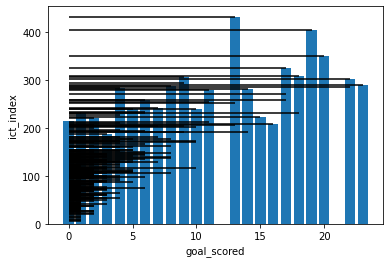

In [10]:
plt.bar(goals_lvl, ict_lvl, align='center') #A bar chart
plt.xlabel('goal_scored')
plt.ylabel('ict_index')
for i in range(len(ict_lvl)):
    plt.hlines(ict_lvl[i], 0, goals_lvl[i])
plt.show()

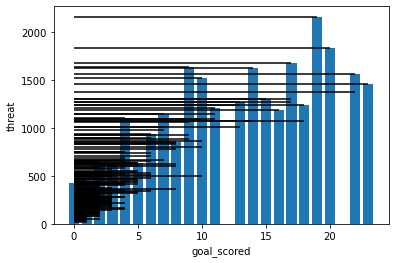

In [11]:
plt.bar(goals_lvl, threat_lvl, align='center') # A bar chart
plt.xlabel('goal_scored')
plt.ylabel('threat')
for i in range(len(threat_lvl)):
    plt.hlines(threat_lvl[i], 0, goals_lvl[i])
plt.show()

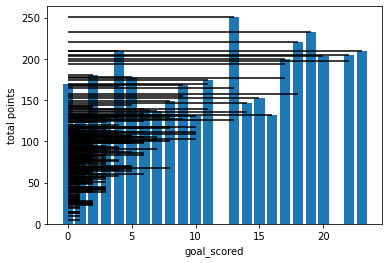

In [12]:
plt.bar(goals_lvl, points_lvl, align='center') # A bar chart
plt.xlabel('goal_scored')
plt.ylabel('total points')
for i in range(len(points_lvl)):
    plt.hlines(points_lvl[i], 0, goals_lvl[i])
plt.show()

In [13]:
slim_df.sort_values('total_points', ascending=False).head(10)

,second_name,goals_scored,ict_index,threat,total_points,selected_by_percent
338,De Bruyne,13,432.1,1005.0,251,48.9
305,Salah,19,405.1,2156.0,233,32.4
306,Mané,18,307.7,1239.0,221,19.7
270,Vardy,23,288.8,1455.0,210,27.2
296,Alexander-Arnold,4,282.8,420.0,210,39.1
10,Aubameyang,22,285.2,1369.0,205,22.4
337,Sterling,20,350.2,1829.0,204,23.2
372,Martial,17,259.4,1297.0,200,22.5
499,Ings,22,302.4,1558.0,198,31.4
642,Jiménez,17,325.4,1680.0,194,29.5


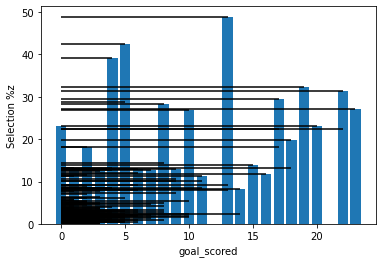

In [14]:
plt.bar(goals_lvl, slect_per_lvl, align='center') # A bar chart
plt.xlabel('goal_scored')
plt.ylabel('Selection %z')
for i in range(len(slect_per_lvl)):
    plt.hlines(slect_per_lvl[i], 0, goals_lvl[i])
plt.show()

In [15]:
slim_df.sort_values('selected_by_percent', ascending=False).head(20)

,second_name,goals_scored,ict_index,threat,total_points,selected_by_percent
338,De Bruyne,13,432.1,1005.0,251,48.9
297,van Dijk,5,154.8,467.0,178,42.4
296,Alexander-Arnold,4,282.8,420.0,210,39.1
305,Salah,19,405.1,2156.0,233,32.4
499,Ings,22,302.4,1558.0,198,31.4
642,Jiménez,17,325.4,1680.0,194,29.5
467,Lundstram,5,133.9,449.0,144,28.8
386,Borges Fernandes,8,139.2,361.0,117,28.4
270,Vardy,23,288.8,1455.0,210,27.2
367,Greenwood,10,117.0,502.0,103,26.9


In [16]:
slim_df.describe()

,goals_scored,ict_index,threat,total_points,selected_by_percent
count,666.000000,666.000000,666.000000,666.000000,666.000000
mean,1.503003,60.220270,188.858859,46.564565,2.248949
std,3.270394,71.268005,309.390973,49.826582,5.335212
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.425000,0.000000,1.000000,0.100000
50%,0.000000,39.250000,61.500000,33.000000,0.350000
75%,2.000000,93.400000,241.000000,76.750000,1.700000
max,23.000000,432.100000,2156.000000,251.000000,48.900000


In [ ]:
#fnc to 
play_for_captain():
    players = {1: ['player_name', 'total_points'], 2:['player_name2', 'total_points']}
    probablity_of_scoring = 
    if probablity_of_scoring == 
    